In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [5]:
data=pd.read_csv("C:\\Users\\dhara\\Documents\\Datascience\\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### percentage of total not fraud transaction

In [10]:
Per_nf=round(data['Class'].value_counts()[0]/len(data)*100,2)
Per_nf

99.83

#### percentage of total fraud transaction

In [11]:
Per_f=round(data['Class'].value_counts()[1]/len(data)*100,2)
Per_f

0.17

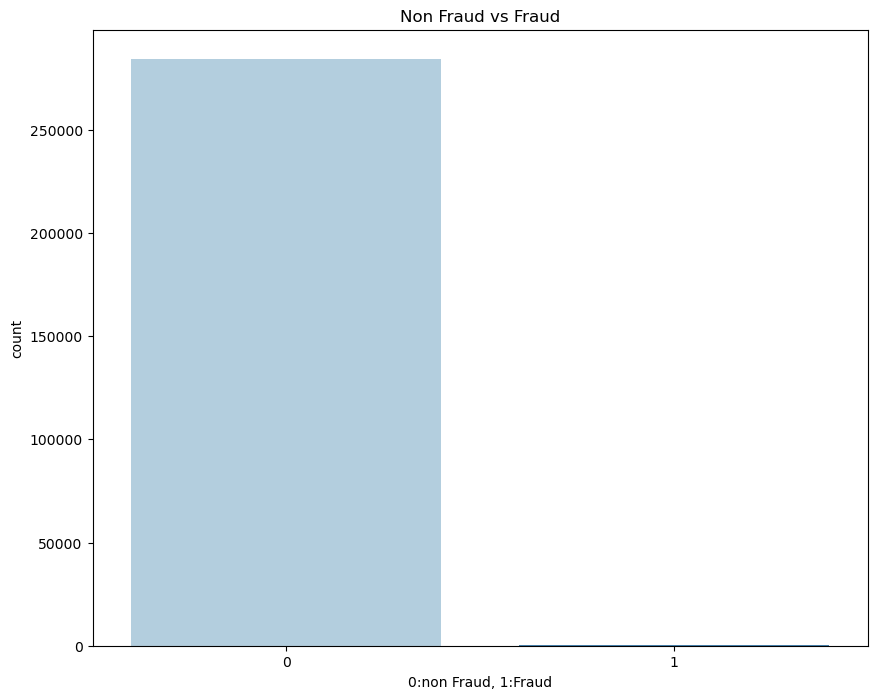

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['Class'].value_counts().index,y=data['Class'].value_counts(),palette='Blues')
plt.title("Non Fraud vs Fraud")
plt.xlabel('0:non Fraud, 1:Fraud')
plt.ylabel('count')
plt.show()

In [13]:
x=data.drop(['Class','Time','Amount'],axis=1)
y=data['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
xg = xgb.XGBClassifier()

In [16]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
xg.score(x_test,y_test)

0.9995786664794073

In [18]:
y_pred=xg.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [19]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[56862,     2],
       [   22,    76]], dtype=int64)

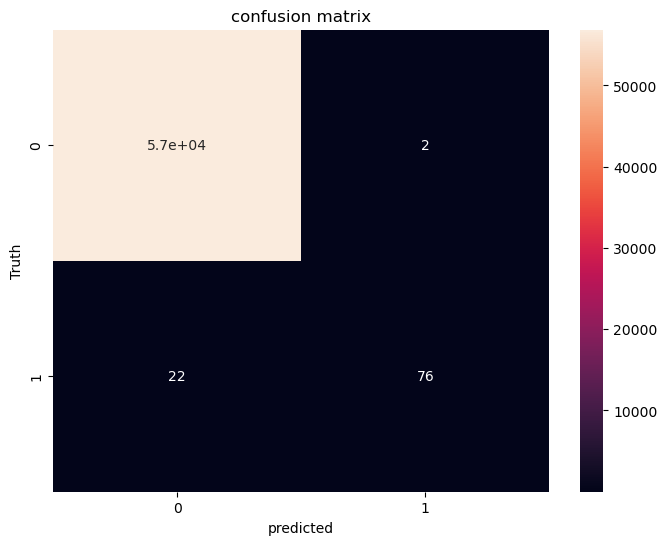

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

### with XGBoost Model,
### 56862 transactions classified as normal and  were actually normal
### 2 transaction classified as fraud,but were actually normal(type 1 error)
### 22 transaction classified as normal,but which were fraud(type 2 error)
### 76 transaction classified as fraud,and were actually fraud

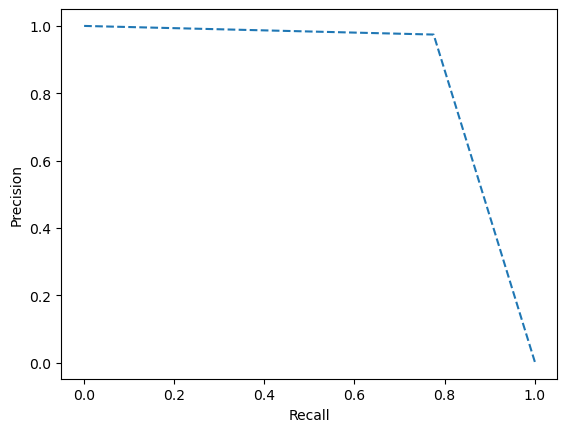

AUPRC:  0.8751277004172419


In [21]:
# ploting the precision-recall curve and calculating the AUPRC 'Area under precision recall curve'.
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
# calculate precision-recall AUC
print('AUPRC: ', auc(recall, precision))

In [23]:
# calculating the different metrics.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Model Accuracy : ", accuracy)
print('Precision on testing set:', precision)
print('Recall on testing set:', recall)

Model Accuracy :  0.9995786664794073
Precision on testing set: 0.9743589743589743
Recall on testing set: 0.7755102040816326


### XG-Boost With Over Sampling

In [24]:
X_resample, y_resample = SMOTE().fit_resample(x, y)

C:\Users\dhara\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [25]:
y_resample.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size= 0.20, random_state= 25)

In [28]:
model_resample = xgb.XGBClassifier()
model_resample.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
predictions = model_resample.predict(X_test)

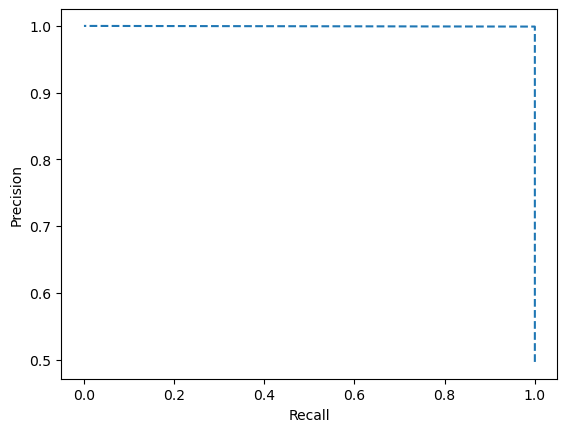

AUPRC:  0.9995046089064241


In [30]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
plt.plot(recall, precision, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
# calculate precision-recall AUC
print('AUPRC: ', auc(recall, precision))

In [31]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print("Model Accuracy : ", accuracy)
print('Precision on testing set:', precision)
print('Recall on testing set:', recall)

Model Accuracy :  0.9995075884142588
Precision on testing set: 0.9990092178128483
Recall on testing set: 1.0


In [32]:
cm=confusion_matrix(y_test,predictions)
cm

array([[57205,    56],
       [    0, 56465]], dtype=int64)

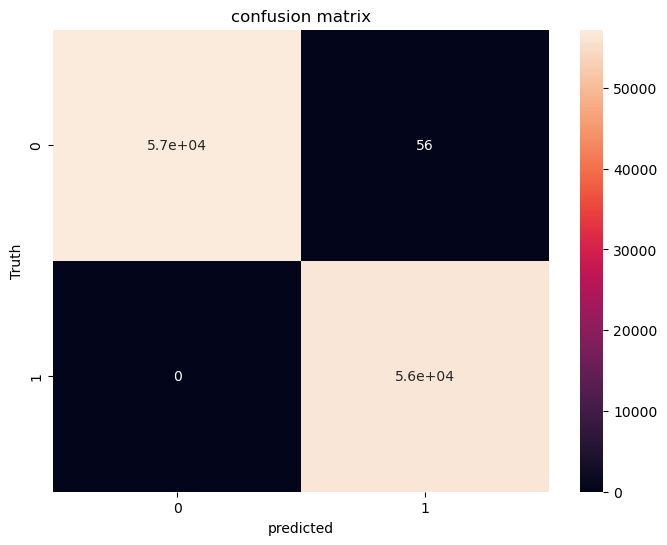

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

### with XGBoost over sampling Model,
### 57205 transactions classified as normal and  were actually normal
### 56 transaction classified as fraud,but were actually normal(type 1 error)
### 0 transaction classified as normal,but which were fraud(type 2 error)
### 56465 transaction classified as fraud,and were actually fraud

In [36]:
xg.save_model('C:\\Users\\dhara\\Documents\\Datascience\\Credit Card Classifier.h3')
model_resample.save_model('C:\\Users\\dhara\\Documents\\Datascience\\Credit Card Classifier-oversampled.h3')

C:\Users\dhara\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:08:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
